# Notebook to test the effects of localisation of wannier functions on optical properties.

In [1]:
from yambopy import *

In [4]:
WORK_PATH = "/Users/6179304/Developer/calculations/WS2/"

In [7]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.0,  0.0,  0.0],'$\Gamma$'],
                     [[0.5, 0.0,  0.0],'M'],  
              [[  1/3,  1/3,  0.0],'K'],
              [[  0.0,  0.0,  0.0],'$\Gamma$']],[npoints,npoints,npoints] )
# Generate list of q-points with weights
klist = path_kpoints.get_klist()


(-7.5, 7.5)

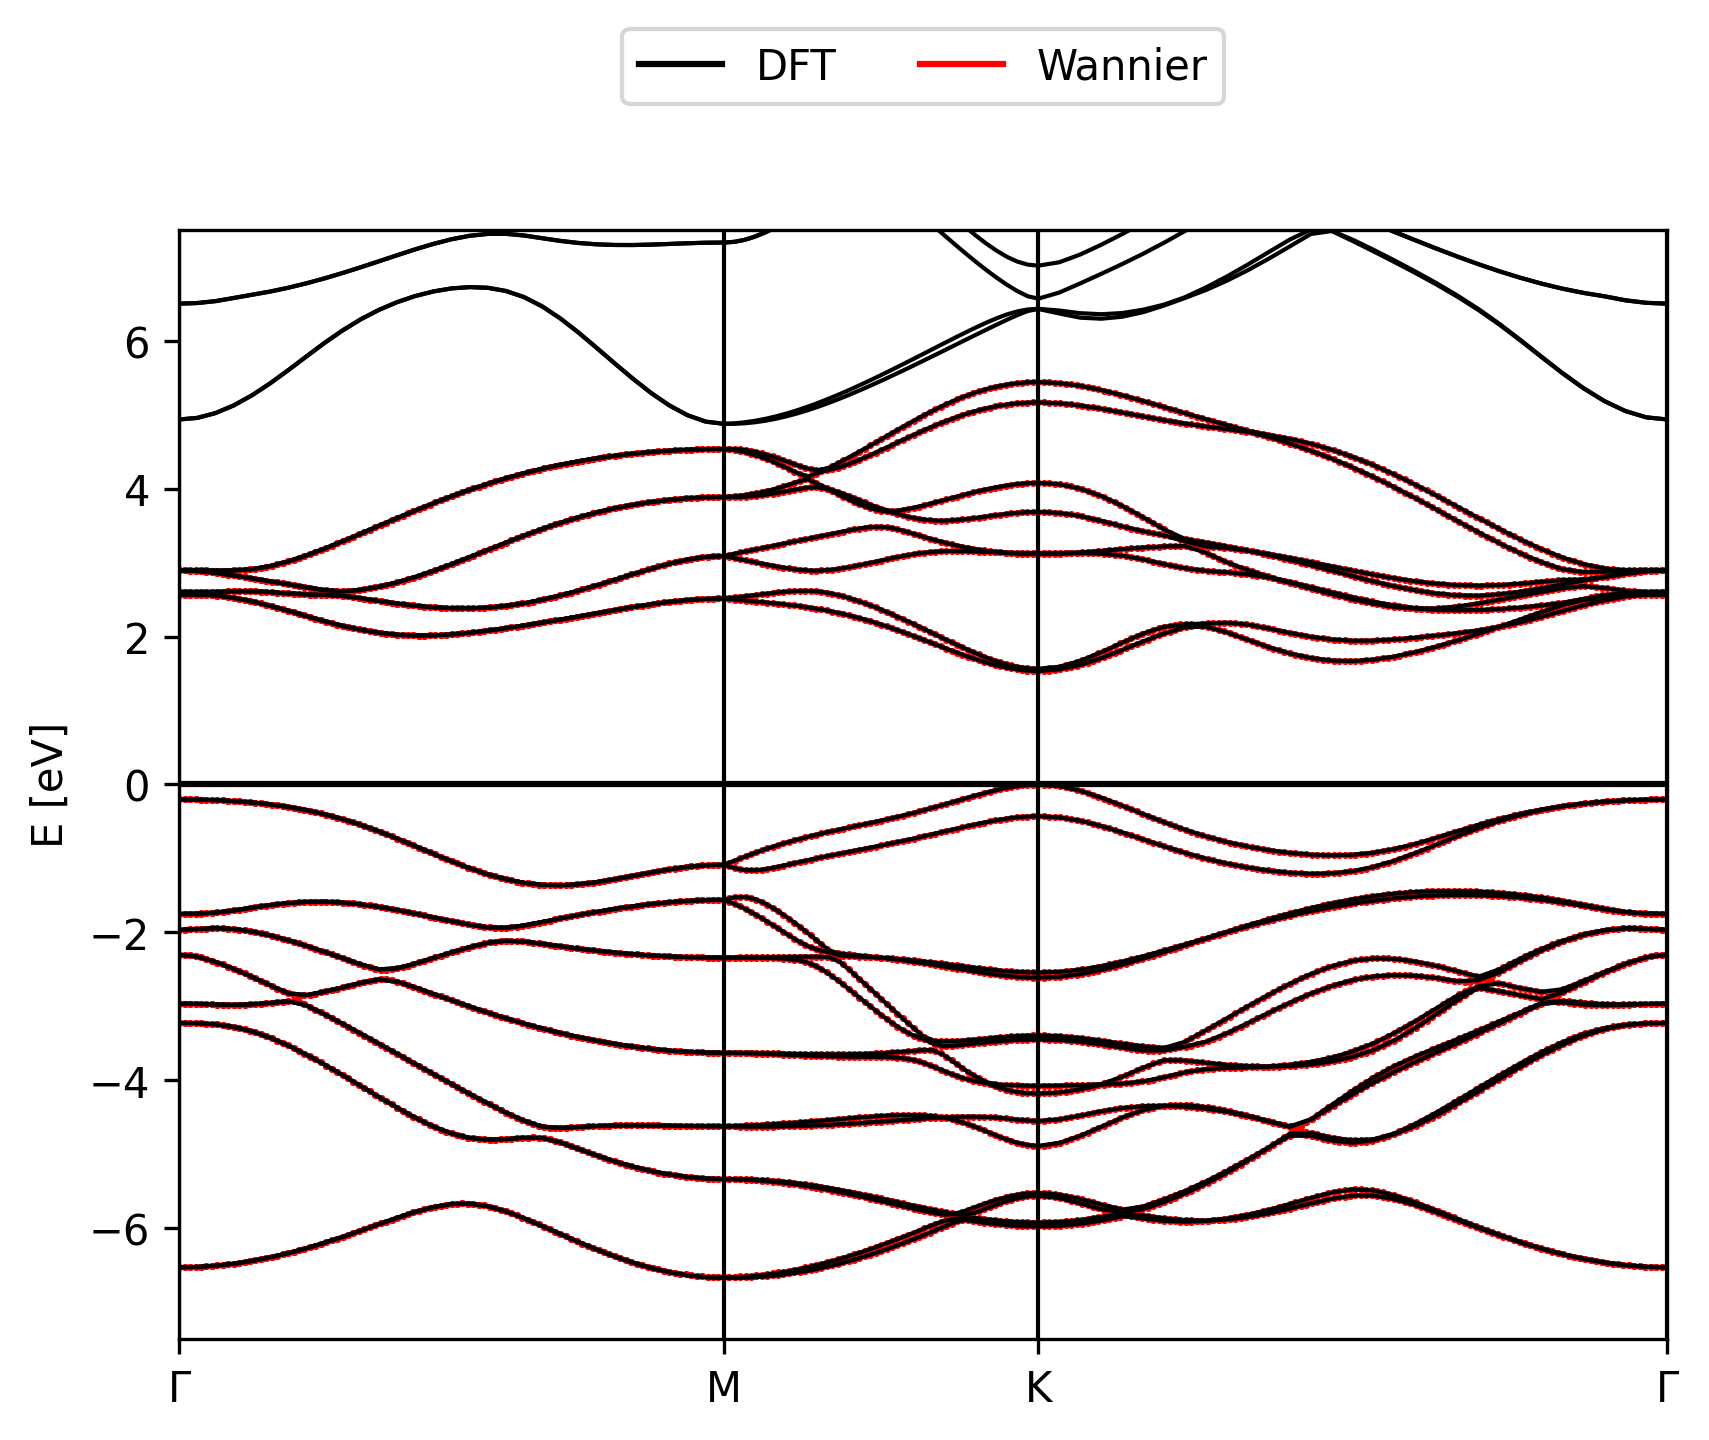

In [31]:
import matplotlib.lines as mlines

fig,ax = plt.subplots(dpi=300)

dotsize = 10 #size of the dots, change at will
ticks, labels =list(zip(*path_kpoints.get_indexes()))
band = ProjwfcXML(prefix='ws2',path=f'{WORK_PATH}/bands_38/out/',qe_version='7.0')
kpoints_dists = calculate_distances(xml.kpoints[:xml.nkpoints])

band.plot_eigen(ax,path_kpoints=path_kpoints,selected_orbitals=[],color='blue',size=dotsize, bandmax=35)
for ib in range(xml.nbands):
  ax.plot(kpoints_dists, xml.eigen[:,ib], c='black',lw=1.0)


wann_bands = np.loadtxt(f'{WORK_PATH}/nscf-wannier-18x18x1/ws2_band.dat',usecols=(0,1))
ax.scatter(wann_bands[:,0]/np.max(wann_bands[:,0])*np.max(kpoints_dists), wann_bands[:,1]+5.4606, c='red',s=0.5)


legend_entries = [
    mlines.Line2D([], [], color='black', ls ='-', label='DFT'),
    mlines.Line2D([], [], color='red', label='Wannier'),
]
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)

ax.set_ylabel('E [eV]')
ax.set_ylim([-7.5,7.5])


In [44]:
lat_k = YamboLatticeDB.from_db_file(folder=f'{WORK_PATH}nscf-18x18x1/out/ws2.save/SAVE', Expand=True)
nnkp_kgrid = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-18x18x1/ws2', lat_k, yambo_grid=True)
nnkp_kgrid.generate()
hrk=HR(f'{WORK_PATH}/nscf-wannier-18x18x1/ws2')


37 kpoints expanded to 324
Time for NNKP.__init__() : 0.026289939880371094
Time for HR.__init__() : 0.08911824226379395 , read : 0.08551502227783203 , headstring 0.003603219985961914


In [40]:
model = TBMODEL.from_wannier_files(
    hr_file=f'{WORK_PATH}nscf-wannier-18x18x1/ws2_hr.dat',
    wsvec_file=f'{WORK_PATH}nscf-wannier-18x18x1/ws2_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{WORK_PATH}nscf-wannier-18x18x1/ws2.win'
)
#set the grid
model.set_mpgrid(nnkp_kgrid)


(array([ 0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.41421356,  1.41421356,  1.41421356,  1.41421356,  2.        ,
         2.        ,  2.        ,  2.        ,  2.23606798,  2.23606798,
         2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
         2.23606798,  2.82842712,  2.82842712,  2.82842712,  2.82842712,
         3.        ,  3.        ,  3.        ,  3.        ,  3.16227766,
         3.16227766,  3.16227766,  3.16227766,  3.16227766,  3.16227766,
         3.16227766,  3.16227766,  3.60555128,  3.60555128,  3.60555128,
         3.60555128,  3.60555128,  3.60555128,  3.60555128,  3.60555128,
         4.        ,  4.        ,  4.        ,  4.        ,  4.12310563,
         4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
         4.12310563,  4.12310563,  4.24264069,  4.24264069,  4.24264069,
         4.24264069,  4.47213595,  4.47213595,  4.47213595,  4.47213595,
         4.47213595,  4.47213595,  4.47213595,  4.4

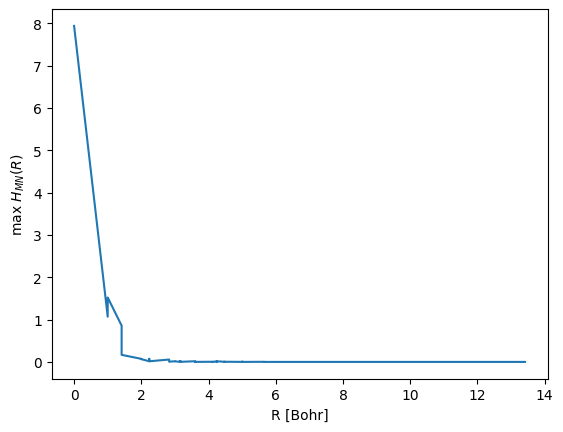

In [43]:
model.decay_R(lat=lat_k,hr=hrk, fermie=-4)

In [ ]:
fermie =-4.0
model.solve_ham_from_hr(lat_k, hrk, fermie=fermie)
hlm = model.get_hlm(lat_k.lat, hrk)

Diagonalization took 0.044 s


Text(0, 0.5, 'E [eV]')

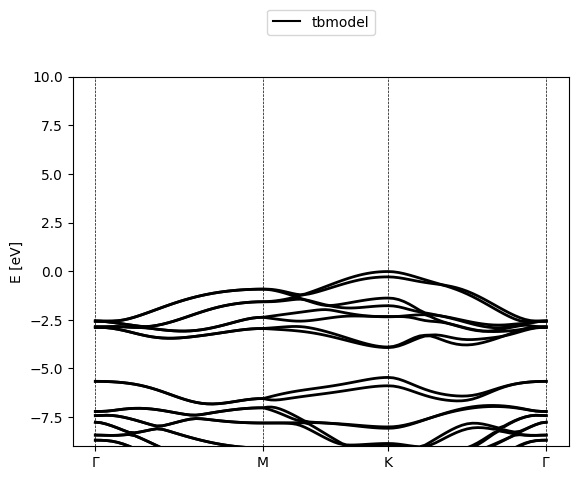

In [ ]:
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, lat_k.rlat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints
H_atk = model.solve_ham_from_hr(lat_k, hrk , fermie = -4.0)
E_k= np.array(model.get_eigenval(kpoints_red,from_hr=True))
nbands = E_k.shape[1]
nkpoints = E_k.shape[0]
nkpointwant = 90
efermi = -4
tb_ebands = YambopyBandStructure(E_k,kpoints_red,kpath=path_kpoints)
tb_kdist = tb_ebands.distances
# Class PwXML. QE database reading
# xml = PwXML(prefix='ws2',path=f'{shared_dir}/bands_38/out')#,qe_version='6.7')
# want_bands = np.loadtxt(f'{shared_dir}wantibexos-6x6x1/out/bands.dat',usecols=(0,1))
# Class PwXML. QE database reading

fig, ax = plt.subplots()
# xml = PwXML(prefix='ws2',path=f'{shared_dir}/bands/out')#,qe_version='6.7')

kpoints_dists = calculate_distances(xml.kpoints[:xml.nkpoints])
for ib in range(nbands):
  ax.plot(tb_kdist, E_k[:,ib], c='black', ls = '-', lw=2.0)

# fact = np.max(tb_kdist)/np.max(want_bands[:,0])

# for ib in range(xml.nbands):
  # ax.plot(kpoints_dists/np.max(kpoints_dists) * np.max(tb_kdist), xml.eigen1[:,ib]+efermi, c='black',ls='--',lw=1.0)  
tb_eb = tb_ebands.add_kpath_labels(ax)
legend_entries = [
    mlines.Line2D([], [], color='black', ls ='-', label='tbmodel'),
    # mlines.Line2D([], [], color='black', label='wantibexos'),
]

# Add custom legend outside the loop
ax.set_ylim(-9,10)
ax.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3)
ax.set_ylabel('E [eV]')